In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [44]:
# Load the dataset
data_path = '/content/telecom_customer_churn.csv'
df = pd.read_csv(data_path)

profile = ProfileReport(df,title="Tele_Profile")
profile.to_file("/kaggle/working/Tele_Profile.html")

# **basic inspection**

In [45]:
pd.set_option('display.max_columns', None)
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [46]:
df.columns = df.columns.str.replace(' ', '_')

In [47]:
df.describe()

,Age,Number_of_Dependents,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [48]:
df.describe(include='object').T

,count,unique,top,freq
Customer_ID,7043,7043,0002-ORFBO,1
Gender,7043,2,Male,3555
Married,7043,2,No,3641
City,7043,1106,Los Angeles,293
Offer,3166,5,Offer B,824
Phone_Service,7043,2,Yes,6361
Multiple_Lines,6361,2,No,3390
Internet_Service,7043,2,Yes,5517
Internet_Type,5517,3,Fiber Optic,3035
Online_Security,5517,2,No,3498


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number_of_Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip_Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number_of_Referrals                7043 non-null   int64  
 10  Tenure_in_Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [50]:
print(df.isnull().sum())

Customer_ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number_of_Dependents                    0
City                                    0
Zip_Code                                0
Latitude                                0
Longitude                               0
Number_of_Referrals                     0
Tenure_in_Months                        0
Offer                                3877
Phone_Service                           0
Avg_Monthly_Long_Distance_Charges     682
Multiple_Lines                        682
Internet_Service                        0
Internet_Type                        1526
Avg_Monthly_GB_Download              1526
Online_Security                      1526
Online_Backup                        1526
Device_Protection_Plan               1526
Premium_Tech_Support                 1526
Streaming_TV                         1526
Streaming_Movies                  

# **DV1**

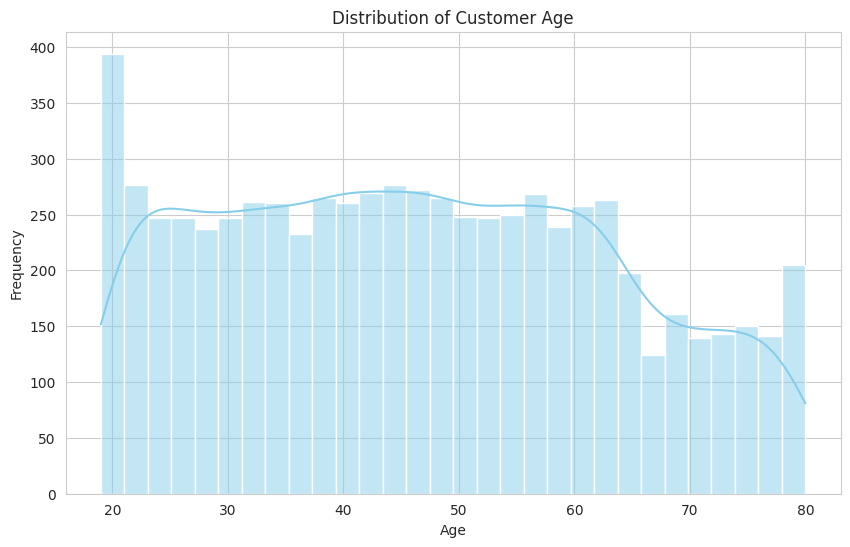

In [51]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

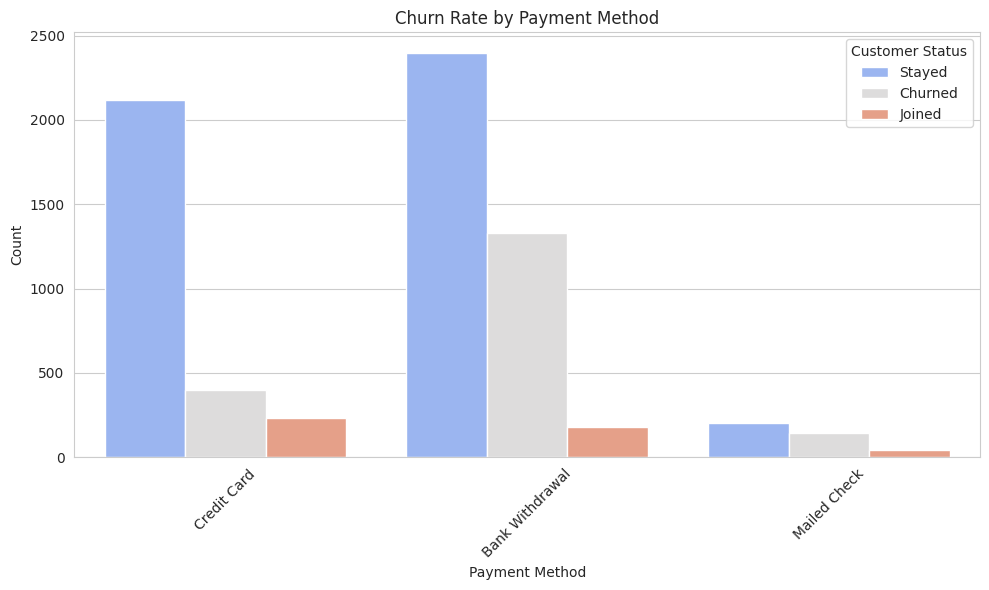

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_Method', hue='Customer_Status', data=df, palette='coolwarm')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Status')
plt.tight_layout()
plt.show()

<ipython-input-53-af6ec9cc262b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer_Status', y='Monthly_Charge', data=df, palette='pastel')


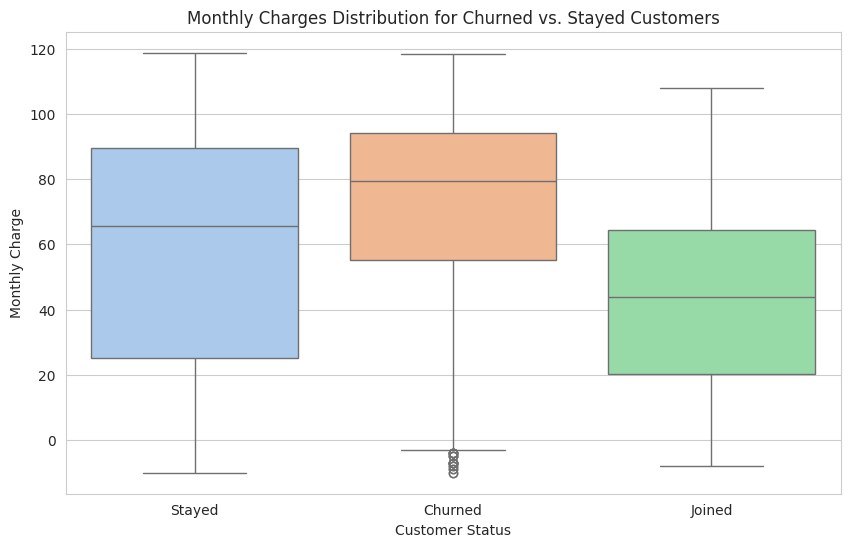

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Status', y='Monthly_Charge', data=df, palette='pastel')
plt.title('Monthly Charges Distribution for Churned vs. Stayed Customers')
plt.xlabel('Customer Status')
plt.ylabel('Monthly Charge')
plt.show()

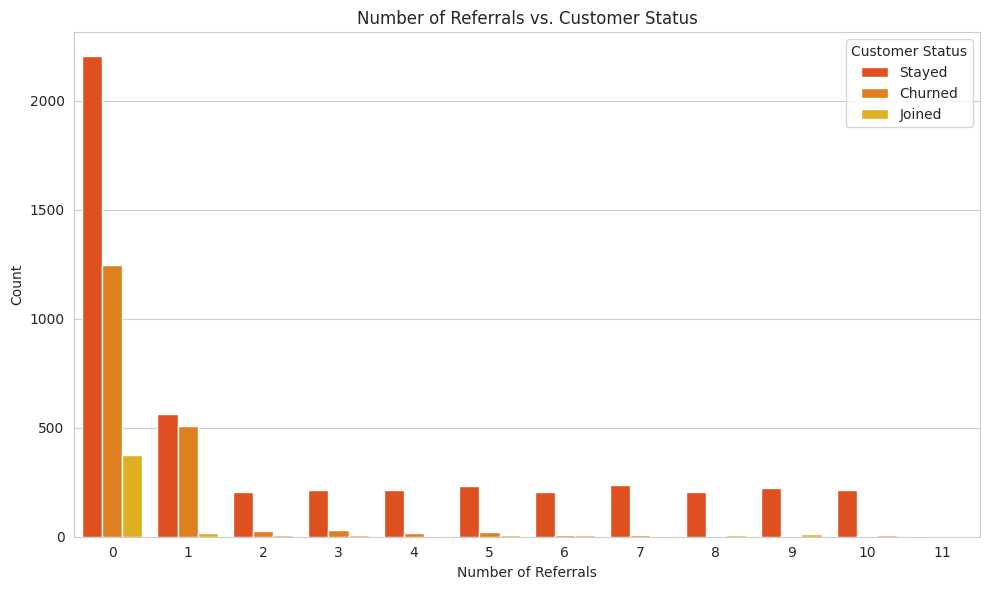

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Number_of_Referrals', hue='Customer_Status', data=df, palette='autumn')
plt.title('Number of Referrals vs. Customer Status')
plt.xlabel('Number of Referrals')
plt.ylabel('Count')
plt.legend(title='Customer Status', loc='upper right')
plt.tight_layout()
plt.show()

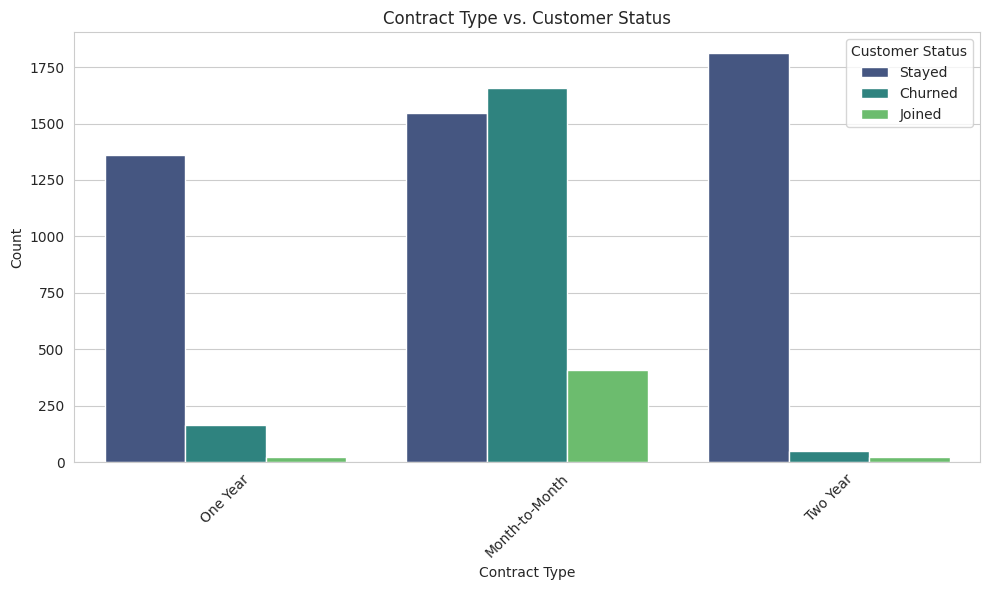

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Customer_Status', data=df, palette='viridis')
plt.title('Contract Type vs. Customer Status')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

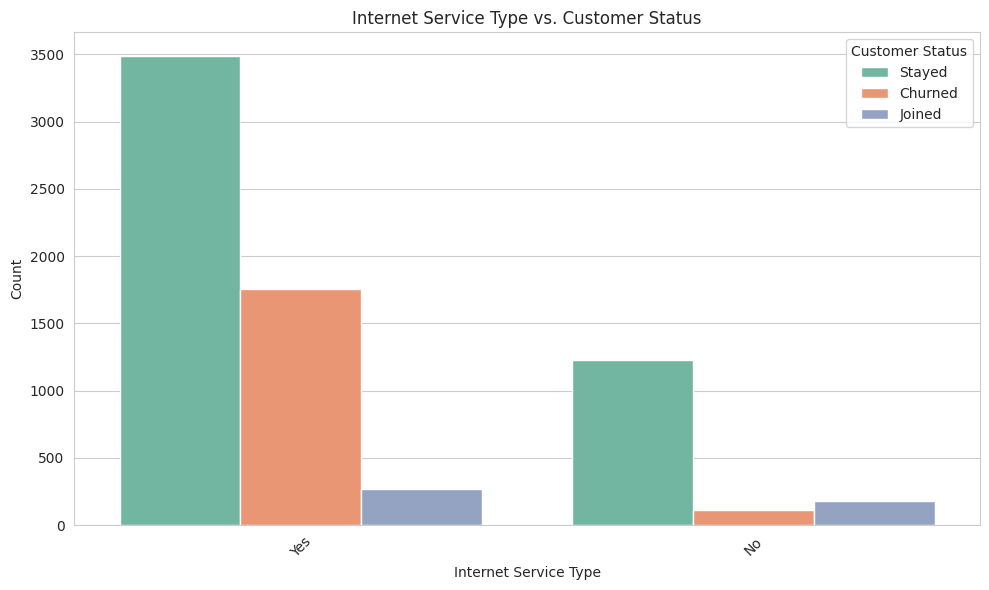

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Internet_Service', hue='Customer_Status', data=df, palette='Set2')
plt.title('Internet Service Type vs. Customer Status')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

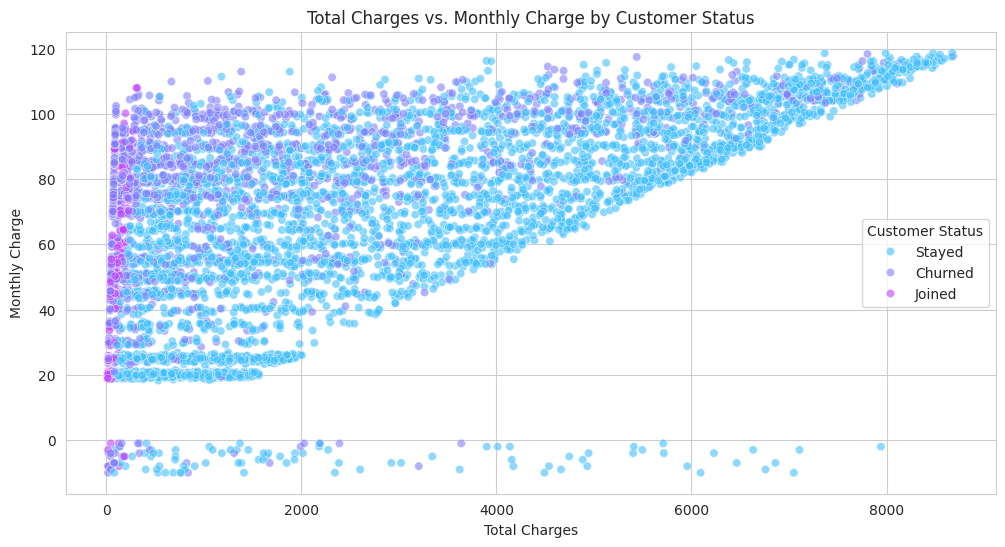

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Charges', y='Monthly_Charge', hue='Customer_Status', data=df, palette='cool', alpha=0.6)
plt.title('Total Charges vs. Monthly Charge by Customer Status')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charge')
plt.legend(title='Customer Status')
plt.show()

# **handling missing values**

In [58]:
numerical_columns = ['Avg_Monthly_Long_Distance_Charges', 'Avg_Monthly_GB_Download']
for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns
for column in categorical_cols:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [59]:
print(df.isnull().sum())

Customer_ID                          0
Gender                               0
Age                                  0
Married                              0
Number_of_Dependents                 0
City                                 0
Zip_Code                             0
Latitude                             0
Longitude                            0
Number_of_Referrals                  0
Tenure_in_Months                     0
Offer                                0
Phone_Service                        0
Avg_Monthly_Long_Distance_Charges    0
Multiple_Lines                       0
Internet_Service                     0
Internet_Type                        0
Avg_Monthly_GB_Download              0
Online_Security                      0
Online_Backup                        0
Device_Protection_Plan               0
Premium_Tech_Support                 0
Streaming_TV                         0
Streaming_Movies                     0
Streaming_Music                      0
Unlimited_Data           

# **preprocessing**

In [60]:
X = df.drop(['Customer_ID', 'Customer_Status', 'Churn_Reason','City','Churn_Category'], axis=1)
y = df['Customer_Status'].apply(lambda x: 1 if x == 'Churned' else 0)

In [61]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)
categorical_features = X.select_dtypes(include=['object', 'category']).columns
print(categorical_features)

Index(['Age', 'Number_of_Dependents', 'Zip_Code', 'Latitude', 'Longitude',
       'Number_of_Referrals', 'Tenure_in_Months',
       'Avg_Monthly_Long_Distance_Charges', 'Avg_Monthly_GB_Download',
       'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue'],
      dtype='object')
Index(['Gender', 'Married', 'Offer', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method'],
      dtype='object')


In [62]:
for cat_feat in categorical_features:
    print(X[cat_feat].unique())

['Female' 'Male']
['Yes' 'No']
['Offer B' 'Offer E' 'Offer D' 'Offer A' 'Offer C']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Cable' 'Fiber Optic' 'DSL']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['One Year' 'Month-to-Month' 'Two Year']
['Yes' 'No']
['Credit Card' 'Bank Withdrawal' 'Mailed Check']


# **encoding and standardization**

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for num_feat in numerical_features:
    X[num_feat] = scaler.fit_transform(X[[num_feat]])

In [64]:
X = pd.get_dummies(X, columns=categorical_features, drop_first=False)

In [65]:
pd.set_option('display.max_columns', None)
X.head()

,Age,Number_of_Dependents,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Gender_Female,Gender_Male,Married_No,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone_Service_No,Phone_Service_Yes,Multiple_Lines_No,Multiple_Lines_Yes,Internet_Service_No,Internet_Service_Yes,Internet_Type_Cable,Internet_Type_DSL,Internet_Type_Fiber Optic,Online_Security_No,Online_Security_Yes,Online_Backup_No,Online_Backup_Yes,Device_Protection_Plan_No,Device_Protection_Plan_Yes,Premium_Tech_Support_No,Premium_Tech_Support_Yes,Streaming_TV_No,Streaming_TV_Yes,Streaming_Movies_No,Streaming_Movies_Yes,Streaming_Music_No,Streaming_Music_Yes,Unlimited_Data_No,Unlimited_Data_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank Withdrawal,Payment_Method_Credit Card,Payment_Method_Mailed Check
0,0.295082,0.0,0.524313,0.241523,0.524540,0.181818,0.112676,0.844835,0.168675,0.587184,0.066294,0.000000,0.000000,0.107024,0.079733,True,False,False,True,False,True,False,False,False,False,True,True,False,False,True,True,False,False,True,False,False,True,True,False,False,True,False,True,True,False,True,False,False,True,False,True,False,False,True,False,True,False
1,0.442623,0.0,0.195967,0.170810,0.603207,0.000000,0.112676,0.197632,0.096386,0.046602,0.060420,0.769833,0.066667,0.026989,0.049249,False,True,True,False,False,True,False,False,False,False,True,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,True,False,False,True,False,False,True,False
2,0.508197,0.0,0.427061,0.115863,0.631031,0.000000,0.042254,0.666394,0.337349,0.651650,0.030239,0.000000,0.000000,0.037759,0.032956,False,True,True,False,False,False,False,False,True,False,True,True,False,False,True,False,False,True,True,False,True,False,False,True,True,False,True,False,True,False,True,False,False,True,True,False,False,False,True,True,False,False
3,0.967213,0.0,0.740283,0.580316,0.216248,0.090909,0.169014,0.547366,0.024096,0.838835,0.140670,0.000000,0.000000,0.101455,0.131975,False,True,False,True,False,False,False,True,False,False,True,True,False,False,True,False,False,True,True,False,False,True,False,True,True,False,False,True,False,True,True,False,False,True,True,False,False,False,True,True,False,False
4,0.918033,0.0,0.489348,0.177755,0.516544,0.272727,0.028169,0.130053,0.108434,0.729320,0.028687,0.000000,0.000000,0.006211,0.022427,True,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False,False,True,True,False,False,False,True,False,True,False


# **Statstical tests : **

Infernece: whether there is a significant difference in the ages of customers who churned compared to those who stayed.

H0=no difference in age distributions between two groups
H1= there is significant difference

In [66]:
from scipy.stats import mannwhitneyu

churned_age = df[df['Customer_Status'] == 'Churned']['Age']
non_churned_age = df[df['Customer_Status'] == 'Stayed']['Age']

statistic, p_value = mannwhitneyu(churned_age, non_churned_age)
print("Mann-Whitney U Test for Age Distribution and Churn Rate:")
print("Statistic:", statistic)
print("P-value:", p_value)


Mann-Whitney U Test for Age Distribution and Churn Rate:
Statistic: 5009465.0
P-value: 7.844707735269292e-18


in the above p value is very samll so , there is strong evidence to reject the null hypothesis.

Infernece: to find the linear relationship between total and monthly charges for churned and non- churned customers

In [67]:
from scipy.stats import pearsonr


churned_total_charges = df[df['Customer_Status'] == 'Churned']['Total_Charges']
churned_monthly_charge = df[df['Customer_Status'] == 'Churned']['Monthly_Charge']
pearson_corr_churned, p_value_churned = pearsonr(churned_total_charges, churned_monthly_charge)

print("Pearson Correlation Test for Total Charges vs. Monthly Charges for Churned Customers:")
print("Pearson Correlation Coefficient:", pearson_corr_churned)
print("P-value:", p_value_churned)

non_churned_total_charges = df[df['Customer_Status'] == 'Stayed']['Total_Charges']
non_churned_monthly_charge = df[df['Customer_Status'] == 'Stayed']['Monthly_Charge']
pearson_corr_non_churned, p_value_non_churned = pearsonr(non_churned_total_charges, non_churned_monthly_charge)

print("\nPearson Correlation Test for Total Charges vs. Monthly Charges for Non-Churned Customers:")
print("Pearson Correlation Coefficient:", pearson_corr_non_churned)
print("P-value:", p_value_non_churned)


Pearson Correlation Test for Total Charges vs. Monthly Charges for Churned Customers:
Pearson Correlation Coefficient: 0.5220028409690938
P-value: 3.7703823894898154e-131

Pearson Correlation Test for Total Charges vs. Monthly Charges for Non-Churned Customers:
Pearson Correlation Coefficient: 0.738126399511099
P-value: 0.0


from the above For churned customers, there is a moderate strong positive linear relationship between Total and Monthly Charges, with a very low p-value.
For non-churned customers, there is a strong positive linear relationship between Total and Monthly Charges, with a statistically significant p-value.

Infernece:to find wheather there is significant difference in monthly charges between churned and non-churned customers.

In [68]:
from scipy.stats import mannwhitneyu
churned_monthly_charge = df[df['Customer_Status'] == 'Churned']['Monthly_Charge']
non_churned_monthly_charge = df[df['Customer_Status'] == 'Stayed']['Monthly_Charge']

statistic, p_value = mannwhitneyu(churned_monthly_charge, non_churned_monthly_charge)
print("Mann-Whitney U Test for Monthly Charges and Churn:")
print("Statistic:", statistic)
print("P-value:", p_value)


Mann-Whitney U Test for Monthly Charges and Churn:
Statistic: 5307923.5
P-value: 5.218203130664327e-38


# **Splitting data**

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train.shape

(5634, 57)

In [71]:
X_train.head()

,Age,Number_of_Dependents,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Gender_Female,Gender_Male,Married_No,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone_Service_No,Phone_Service_Yes,Multiple_Lines_No,Multiple_Lines_Yes,Internet_Service_No,Internet_Service_Yes,Internet_Type_Cable,Internet_Type_DSL,Internet_Type_Fiber Optic,Online_Security_No,Online_Security_Yes,Online_Backup_No,Online_Backup_Yes,Device_Protection_Plan_No,Device_Protection_Plan_Yes,Premium_Tech_Support_No,Premium_Tech_Support_Yes,Streaming_TV_No,Streaming_TV_Yes,Streaming_Movies_No,Streaming_Movies_Yes,Streaming_Music_No,Streaming_Music_Yes,Unlimited_Data_No,Unlimited_Data_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank Withdrawal,Payment_Method_Credit Card,Payment_Method_Mailed Check
2142,0.311475,0.222222,0.098065,0.146059,0.622180,0.090909,0.028169,0.659249,0.120482,0.775534,0.026494,0.0,0.000000,0.028025,0.027341,False,True,False,True,False,False,False,False,True,False,True,True,False,False,True,False,False,True,False,True,False,True,True,False,True,False,False,True,True,False,True,False,False,True,True,False,False,True,False,True,False,False
1623,0.049180,0.000000,0.345585,0.035199,0.707249,0.000000,0.492958,0.877093,0.481928,0.735922,0.349798,0.0,0.000000,0.444052,0.385660,False,True,True,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,True,False,False,False,True,True,False,False
6074,0.557377,0.000000,0.699626,0.521168,0.216252,0.181818,0.676056,0.992650,0.084337,0.820194,0.549815,0.0,0.000000,0.682205,0.601607,True,False,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,True,True,False,False,False,True,True,False,False
1362,0.573770,0.000000,0.882095,0.664035,0.134782,0.000000,0.084507,0.371580,0.168675,0.693592,0.058199,0.0,0.066667,0.037722,0.054044,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,True,False,False,False,True,True,False,False
6754,0.311475,0.000000,0.596195,0.471794,0.489995,0.727273,0.014085,0.295835,0.120482,0.427184,0.008187,0.0,0.000000,0.008696,0.008312,True,False,False,True,False,False,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,False,False,True,True,False,False


# **feature selection using stats test: chi2, oversampling, prediction**

These are the 26 features chosen with chi2 scores
Index(['Number_of_Dependents', 'Number_of_Referrals', 'Tenure_in_Months',
       'Monthly_Charge', 'Total_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Married_No', 'Married_Yes', 'Offer_Offer A',
       'Offer_Offer E', 'Internet_Service_No', 'Internet_Service_Yes',
       'Internet_Type_DSL', 'Online_Security_No', 'Online_Security_Yes',
       'Online_Backup_Yes', 'Premium_Tech_Support_No',
       'Premium_Tech_Support_Yes', 'Contract_Month-to-Month',
       'Contract_One Year', 'Contract_Two Year', 'Paperless_Billing_No',
       'Paperless_Billing_Yes', 'Payment_Method_Bank Withdrawal',
       'Payment_Method_Credit Card'],
      dtype='object')
Accuracy: 0.8119233498935415
F1 Score: 0.816059384613942
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1036
           1       0.62      0.72      0.67       373

    accuracy                           0.81      140

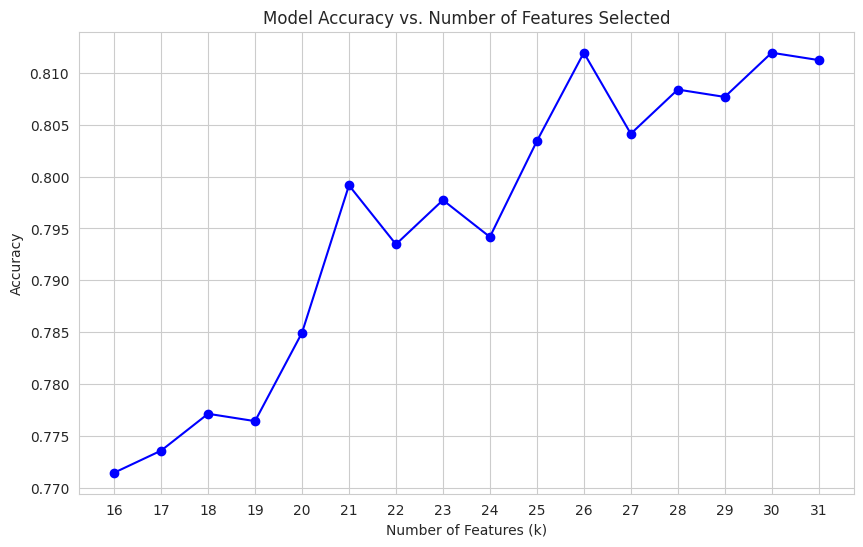

In [72]:
k_values = range(16, 32)
accuracies = []

for k in k_values:
    chi_selector = SelectKBest(chi2, k=k)
    X_train_kbest = chi_selector.fit_transform(X_train, y_train)
    X_test_kbest = chi_selector.transform(X_test)
    if (k==26):
        selected_features_names = X.columns[chi_selector.get_support()]
        print(f"These are the {k} features chosen with chi2 scores")
        print(selected_features_names)

    smote = SMOTE(random_state=42)
    X_train_sm, y_train_sm = smote.fit_resample(X_train_kbest, y_train)

    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train_sm, y_train_sm)
    y_pred = rf_clf.predict(X_test_kbest)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    if(k==26):
        f1 = f1_score(y_test, y_pred, average='weighted')
        print("Accuracy:", accuracy)
        print("F1 Score:", f1)
        print(classification_report(y_test, y_pred))


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy vs. Number of Features Selected')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(min(k_values), max(k_values)+1, 1))
plt.grid(True)
plt.show()


# ROC curve

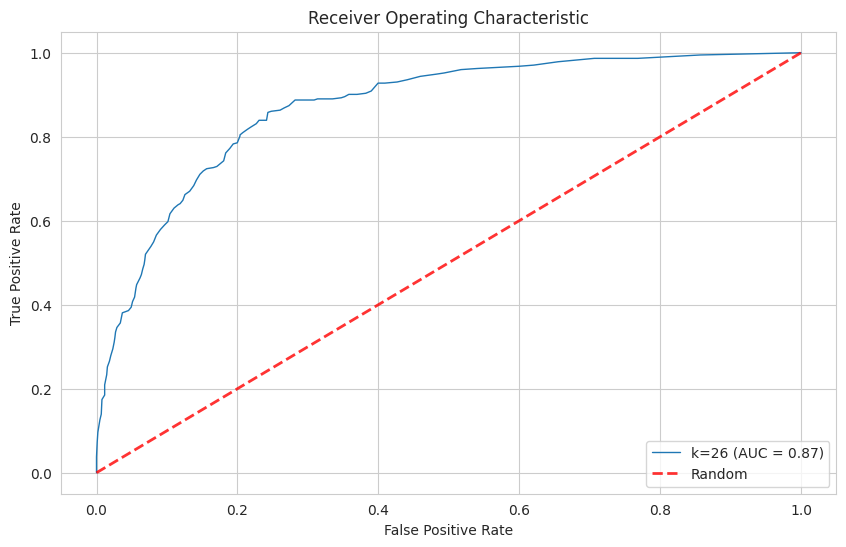

In [81]:
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
k = 26
chi_selector = SelectKBest(chi2, k=k)
X_train_kbest = chi_selector.fit_transform(X_train, y_train)
X_test_kbest = chi_selector.transform(X_test)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_kbest, y_train)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_sm, y_train_sm)
y_prob = rf_clf.predict_proba(X_test_kbest)
fpr, tpr, threshold = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, lw=1, label=f'k={k} (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()